In [39]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [40]:
Data = read_csv('Kenneth_FYP_Benchmark_Data.csv')

In [41]:
Data

,Benchmark,clk_frequency,Instruction_Cache_Total_Accessses,Instruction_Cache_Tag_Lookups,Instruction_Cache_Hits_Number,Instruction_Cache_Line_Hits_Number,Cache_Miss_Number_1,Cache_Hit_Rate_1,Data_Cache_Total_Accessses,Data_Cache_Tag_Lookups,Data_Cache_Hits_Number,Data_Cache_Line_Hits_Number,Cache_Miss_Number_2,Cache_Hit_Rate_2,STIMER_count_32K,Time(s),Clock_Cycles,Instruction_per_clock_cycle,Energy(mJ)
0,DenseNet CMSIS,48,7871885,2681768,2680082,5190117,1686,99.94,200127,139821,132928,60307,6893,95.07,10198,0.311218,1.493848e+07,0.526954,2.589300
1,DenseNet CMSIS,24,7205462,2240076,2238390,4965386,1686,99.92,200127,139821,132928,60307,6893,95.07,18490,0.564270,1.354248e+07,0.532064,3.205680
2,DenseNet,48,23804777,7962237,7961375,15842540,862,99.99,1059327,73155,67494,986177,5661,92.26,31312,0.955566,4.586719e+07,0.518994,8.545770
3,DenseNet,24,23138370,7962241,7961381,15176129,860,99.99,1059423,73175,67514,986253,5661,92.26,60717,1.852936,4.447046e+07,0.520309,9.612060
4,Simple CMSIS,48,7871891,2681773,2680087,5190118,1686,99.94,200127,139821,132928,60307,6893,95.07,7951,0.242645,1.164697e+07,0.675874,2.035830
5,Simple CMSIS,24,7205462,2240076,2238390,4965386,1686,99.92,200127,139821,132928,60307,6893,95.07,14392,0.439209,1.054102e+07,0.683564,2.481570
6,Simple,48,23804774,7962237,7961375,15842537,862,99.99,1059327,73155,67494,986177,5661,92.26,26760,0.816650,3.919922e+07,0.607277,7.048950
7,Simple,24,23138357,7962237,7961375,15176120,862,99.99,1059327,73155,67494,986177,5661,92.26,52007,1.587128,3.809106e+07,0.607448,7.741920
8,BubbleSort,48,93662,21057,21030,72605,27,99.87,431,106,75,325,31,70.75,107,0.003265,1.567383e+05,0.597569,0.371551
9,BubbleSort,24,93662,21057,21030,72605,27,99.87,431,106,75,325,31,70.75,209,0.006378,1.530762e+05,0.611865,0.246330


In [42]:
parameter = Data[['clk_frequency', 'Instruction_Cache_Total_Accessses','Instruction_Cache_Hits_Number', 'Data_Cache_Total_Accessses', 'Data_Cache_Hits_Number', 'Instruction_per_clock_cycle']]

In [43]:
parameter

,clk_frequency,Instruction_Cache_Total_Accessses,Instruction_Cache_Hits_Number,Data_Cache_Total_Accessses,Data_Cache_Hits_Number,Instruction_per_clock_cycle
0,48,7871885,2680082,200127,132928,0.526954
1,24,7205462,2238390,200127,132928,0.532064
2,48,23804777,7961375,1059327,67494,0.518994
3,24,23138370,7961381,1059423,67514,0.520309
4,48,7871891,2680087,200127,132928,0.675874
5,24,7205462,2238390,200127,132928,0.683564
6,48,23804774,7961375,1059327,67494,0.607277
7,24,23138357,7961375,1059327,67494,0.607448
8,48,93662,21030,431,75,0.597569
9,24,93662,21030,431,75,0.611865


In [137]:
energy = Data['Energy(mJ)']

parameter_train, parameter_test, energy_train, energy_test = train_test_split(parameter,energy, random_state = 2)

In [138]:
model = linear_model.LinearRegression()
model.fit(parameter_train, energy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
energy_pred = model.predict(parameter_test)

In [140]:
print(energy_pred)
print(energy_test)

[0.39446308 0.36195139 0.41582101 2.88658019 8.04151634 0.41733014
 1.16321359 0.23492809 0.22755345 0.25384065]
27    0.77796
9     0.24633
14    0.31047
0     2.58930
2     8.54577
30    0.61032
13    0.37362
36    0.48879
17    0.29958
37    0.20778
Name: Energy(mJ), dtype: float64


In [141]:
model.score(parameter_test, energy_test)

0.9793946256981635

In [142]:
mean_squared_error(energy_test, energy_pred)

0.12466426847485826

C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


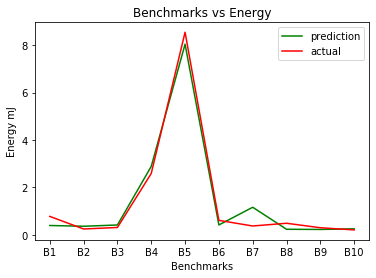

In [143]:
benchmarks=['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9','B10' ]

plt.plot(benchmarks, energy_pred, color = "green", label="prediction")
plt.plot(benchmarks, energy_test, color = "red", label="actual")
plt.title("Benchmarks vs Energy") 
plt.xlabel("Benchmarks") 
plt.ylabel("Energy mJ") 
plt.legend()
plt.show()

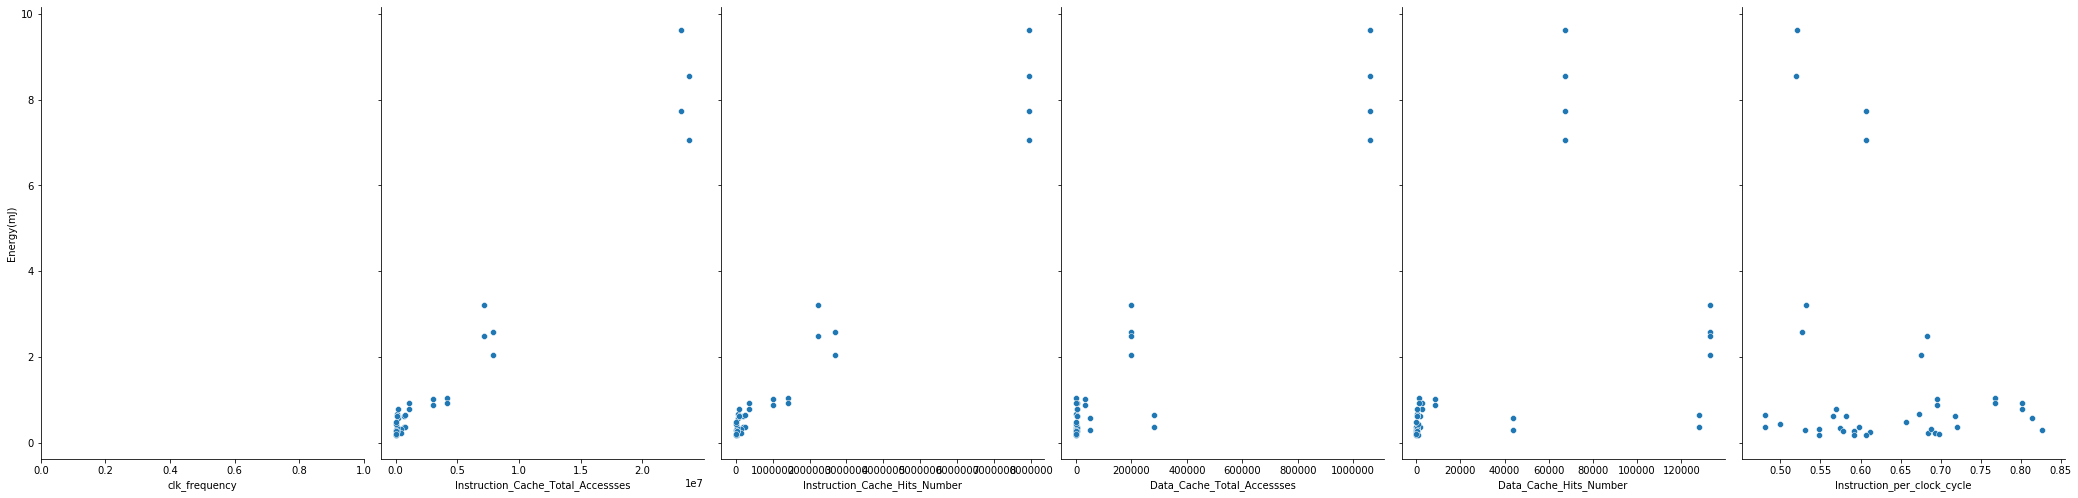

In [108]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(Data, x_vars=['clk_frequency', 'Instruction_Cache_Total_Accessses','Instruction_Cache_Hits_Number', 'Data_Cache_Total_Accessses', 'Data_Cache_Hits_Number', 'Instruction_per_clock_cycle'], y_vars='Energy(mJ)', height=7, aspect=0.7)